In [1]:
import pandas as pd
checkpoint = pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/application-checkpoints.csv")
gpu=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/gpu.csv")
task=pd.read_csv("C:/Users/arush/Downloads/Terapixel_data/task-x-y.csv")

In [2]:
!pip install -U pandasql

In [3]:
from sklearn import datasets
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [4]:
checkpoint.head(10).sort_values(by=['taskId','timestamp'])

,timestamp,hostname,eventName,eventType,jobId,taskId
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
5,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
6,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
8,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e
9,2018-11-08T07:45:20.713Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e


In [5]:
task.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [45]:
q_start_stop='select a.hostname,a.taskId, a.eventName,a.eventType as Start,a.timestamp as Start_Time,b.eventType as Stop,b.timestamp as Stop_Time from checkpoint a INNER JOIN checkpoint b on a.taskId=b.taskId and a.eventName=b.eventName where a.timestamp<b.timestamp order by a.eventName;'
q_start_stop=pysqldf(q_start_stop)
q_start_stop.head()

,hostname,taskId,eventName,Start,Start_Time,Stop,Stop_Time
0,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,Render,START,2018-11-08T07:42:29.845Z,STOP,2018-11-08T07:43:10.965Z
1,0d56a730076643d585f77e00d2d8521a00000N,e7776af5-510d-4ec4-b2d3-222b5df3307b,Render,START,2018-11-08T08:14:53.364Z,STOP,2018-11-08T08:15:32.380Z
2,0d56a730076643d585f77e00d2d8521a00000N,339d3724-dcf6-41f1-b30d-c71107befcee,Render,START,2018-11-08T08:21:58.845Z,STOP,2018-11-08T08:22:38.257Z
3,0d56a730076643d585f77e00d2d8521a00000N,8d663dcb-7a8c-42e9-93de-21d0e6a508f5,Render,START,2018-11-08T07:48:06.922Z,STOP,2018-11-08T07:48:47.993Z
4,0d56a730076643d585f77e00d2d8521a00000N,244fd4f0-104e-4512-93b4-d9f83e2d0d9c,Render,START,2018-11-08T07:59:32.698Z,STOP,2018-11-08T08:00:11.667Z


In [46]:
q_start_stop["Start_Time"]=q_start_stop["Start_Time"].astype('datetime64')
q_start_stop["Stop_Time"]=q_start_stop["Stop_Time"].astype('datetime64')
q_start_stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332670 entries, 0 to 332669
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   hostname    332670 non-null  object        
 1   taskId      332670 non-null  object        
 2   eventName   332670 non-null  object        
 3   Start       332670 non-null  object        
 4   Start_Time  332670 non-null  datetime64[ns]
 5   Stop        332670 non-null  object        
 6   Stop_Time   332670 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 17.8+ MB


In [49]:
q_start_stop['Time_taken']=(q_start_stop['Stop_Time']-q_start_stop['Start_Time']).dt.total_seconds()
q_start_stop.head()

,hostname,taskId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken
0,0d56a730076643d585f77e00d2d8521a00000N,20fb9fcf-a927-4a4b-a64c-70258b66b42d,Render,START,2018-11-08 07:42:29.845,STOP,2018-11-08 07:43:10.965,41.120
1,0d56a730076643d585f77e00d2d8521a00000N,e7776af5-510d-4ec4-b2d3-222b5df3307b,Render,START,2018-11-08 08:14:53.364,STOP,2018-11-08 08:15:32.380,39.016
2,0d56a730076643d585f77e00d2d8521a00000N,339d3724-dcf6-41f1-b30d-c71107befcee,Render,START,2018-11-08 08:21:58.845,STOP,2018-11-08 08:22:38.257,39.412
3,0d56a730076643d585f77e00d2d8521a00000N,8d663dcb-7a8c-42e9-93de-21d0e6a508f5,Render,START,2018-11-08 07:48:06.922,STOP,2018-11-08 07:48:47.993,41.071
4,0d56a730076643d585f77e00d2d8521a00000N,244fd4f0-104e-4512-93b4-d9f83e2d0d9c,Render,START,2018-11-08 07:59:32.698,STOP,2018-11-08 08:00:11.667,38.969


In [48]:
q_start_stop[q_start_stop['Time_taken']<0]

,hostname,taskId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken


In [10]:
q_avg_time_taken="select eventName,AVG(Time_Taken) from q_start_stop where eventName not like '%TotalRender%' group by eventName;"
q_avg_time_taken=pysqldf(q_avg_time_taken)
q_avg_time_taken

,eventName,AVG(Time_Taken)
0,Render,41.227902
1,Saving Config,0.002476
2,Tiling,0.973204
3,Uploading,1.393523


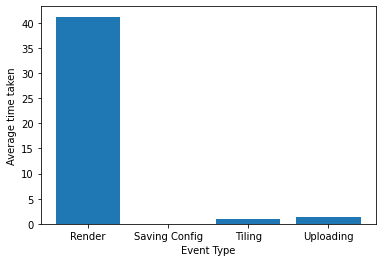

In [11]:
import matplotlib.pyplot as plt
plt.bar(q_avg_time_taken['eventName'],q_avg_time_taken['AVG(Time_Taken)'])
plt.xlabel("Event Type")
plt.ylabel("Average time taken")
plt.show()

In [44]:
gpu.head(20).sort_values(by=['hostname'])

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
7,2018-11-08T08:27:11.089Z,0d56a730076643d585f77e00d2d8521a00000Q,325117171574,GPU-d84a1024-9381-c725-3b85-dd7143e64c35,27.18,35,0,0
6,2018-11-08T08:27:10.737Z,265232c5f6814768aeefa66a7bec6ff600000G,323617043049,GPU-a9683b6b-2830-fe2f-19af-a9e945ada0d5,121.09,41,91,47
16,2018-11-08T08:27:10.917Z,265232c5f6814768aeefa66a7bec6ff600000O,323617020120,GPU-b7e2dffb-a8da-83e5-686e-ef892e27409d,93.58,42,92,41
5,2018-11-08T08:27:10.209Z,265232c5f6814768aeefa66a7bec6ff600000R,323617020227,GPU-71765422-12ec-9ebe-39c7-06b9d8c17a95,120.50,43,88,40
8,2018-11-08T08:27:10.912Z,35bd84d72aca403b8129a7d652cc275000000E,323617020105,GPU-02fa6318-4397-de7b-336e-63196cf3b638,139.63,43,93,56
9,2018-11-08T08:27:10.875Z,4a79b6d2616049edbf06c6aa58ab426a000008,325017019905,GPU-0e6e345c-ba46-d455-b6a1-ba8a2cfc62c0,77.87,36,90,40
13,2018-11-08T08:27:10.955Z,4c72fae95b9147189a0559269a6953ff00000P,325117172543,GPU-159afbfa-9b2e-ec8c-aff4-a920bd54b8ba,96.04,39,90,48
15,2018-11-08T08:27:10.359Z,4c72fae95b9147189a0559269a6953ff00000X,325117063055,GPU-21dc01c9-a613-e5ed-d2f9-e4320a7517e3,146.32,43,93,52
14,2018-11-08T08:27:10.593Z,6139a35676de44d6b61ec247f0ed865700000J,325217086436,GPU-221a4b6f-3450-7e8f-2347-136821d23101,94.27,42,92,46
12,2018-11-08T08:27:10.949Z,83ea61ac1ef54f27a3bf7bd0f41ecaa700000J,323617020883,GPU-8792a29c-529e-1837-1806-c669cd9b1960,42.44,41,0,0


In [42]:
gpu['hostname'].value_counts()

4a79b6d2616049edbf06c6aa58ab426a00000Y    3002
35bd84d72aca403b8129a7d652cc2750000005    3002
0745914f4de046078517041d70b22fe7000005    3002
4ad946d4435c42dabb5073531ea4f315000001    3002
95b4ae6d890e4c46986d91d7ac4bf082000010    2992
                                          ... 
0d56a730076643d585f77e00d2d8521a00000F    1492
0d56a730076643d585f77e00d2d8521a00000I    1492
0d56a730076643d585f77e00d2d8521a00000N    1492
0d56a730076643d585f77e00d2d8521a00000S    1491
0d56a730076643d585f77e00d2d8521a000012    1489
Name: hostname, Length: 1024, dtype: int64

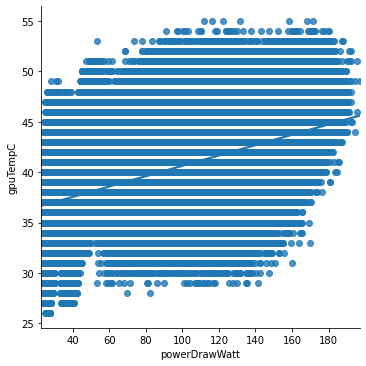

In [25]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.lmplot(x="powerDrawWatt",y="gpuTempC", data=gpu)
plt.show()

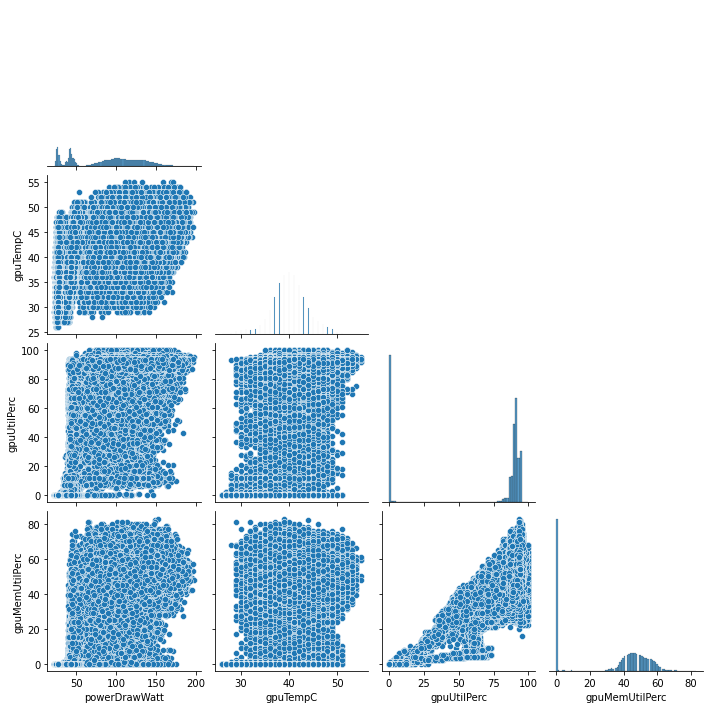

In [35]:
#plt.rcParams['figure.figsize'] = [10,16]
#plt.title("Pairplots for different features of GPU")
sns.pairplot(
    gpu,
    x_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],
    y_vars=["powerDrawWatt","gpuTempC","gpuUtilPerc","gpuMemUtilPerc"],corner=True
)
plt.show()

In [51]:
startstop_task_merge="select ss.hostname,ss.taskId,ss.eventName,t.x,t.y from task t INNER JOIN q_start_stop ss on t.taskId=ss.taskId;"
startstop_task_merge=pysqldf(startstop_task_merge)
startstop_task_merge

,hostname,taskId,eventName,x,y
0,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,Render,116,178
1,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,Saving Config,116,178
2,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,Tiling,116,178
3,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,TotalRender,116,178
4,0745914f4de046078517041d70b22fe7000001,00004e77-304c-4fbd-88a1-1346ef947567,Uploading,116,178
...,...,...,...,...,...
332665,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,Render,7,12
332666,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,Saving Config,7,12
332667,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,Tiling,7,12
332668,04dc4e9647154250beeee51b866b071500000P,ff17a467-9962-4f3d-8e5e-5957efc3e8ab,TotalRender,7,12


In [41]:
startstop_task_merge[startstop_task_merge["taskId"]=="00004e77-304c-4fbd-88a1-1346ef947567"]

,taskId,eventName,Start,Start_Time,Stop,Stop_Time,Time_taken,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,Render,START,2018-11-08 08:06:39.466000,STOP,2018-11-08 08:07:09.706000,30.240,116,178,12
1,00004e77-304c-4fbd-88a1-1346ef947567,Saving Config,START,2018-11-08 08:06:39.464000,STOP,2018-11-08 08:06:39.466000,0.002,116,178,12
2,00004e77-304c-4fbd-88a1-1346ef947567,Tiling,START,2018-11-08 08:07:09.713000,STOP,2018-11-08 08:07:10.688000,0.975,116,178,12
3,00004e77-304c-4fbd-88a1-1346ef947567,TotalRender,START,2018-11-08 08:06:39.464000,STOP,2018-11-08 08:07:10.869000,31.405,116,178,12
4,00004e77-304c-4fbd-88a1-1346ef947567,Uploading,START,2018-11-08 08:07:09.706000,STOP,2018-11-08 08:07:10.869000,1.163,116,178,12


In [ ]:
startstop_task_merge[startstop_task_merge["taskId"]=="00004e77-304c-4fbd-88a1-1346ef947567"]